In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [412]:
df=pd.read_csv(r"C:\Users\admin\Downloads\iris_modified (2).csv")

In [413]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: ylabel='count'>

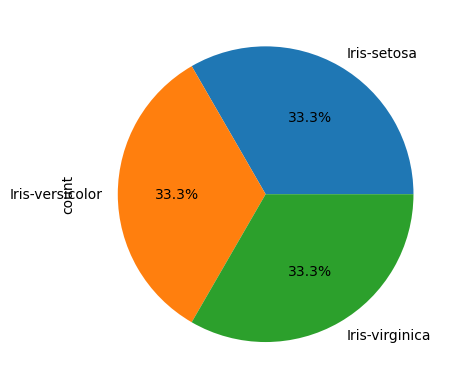

In [414]:
df.species.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [415]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [417]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

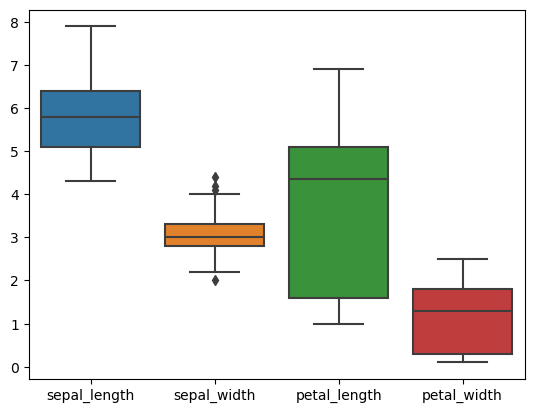

In [418]:
import seaborn as sns
sns.boxplot(df)

In [419]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species'>

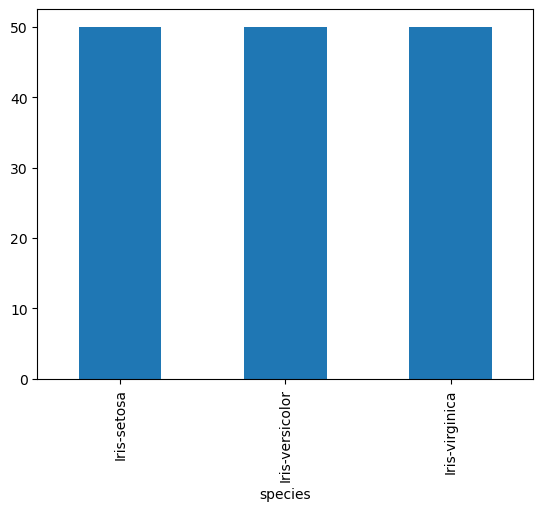

In [420]:
df['species'].value_counts().plot(kind='bar')

In [421]:
from sklearn.preprocessing import LabelEncoder

In [422]:
l=LabelEncoder()

In [423]:
df['species']=l.fit_transform(df[['species']])

C:\Users\admin\ana\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [424]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [425]:
X=df.drop(['species'],axis=1)
y=df['species']

In [426]:
from sklearn.model_selection import train_test_split

In [427]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [428]:
from sklearn.ensemble import RandomForestClassifier

In [429]:
r=RandomForestClassifier()

In [430]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [431]:
r.score(x_test,y_test)

0.9666666666666667

In [432]:
r.score(x_train,y_train)

1.0

In [433]:
param_dict={
    "n_estimators":[10,20],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[5,10],
    "max_depth":[20,25],
    
                  
}

In [434]:
from sklearn.model_selection import GridSearchCV

In [435]:
grid=GridSearchCV(estimator=r,param_grid=param_dict,cv=5,n_jobs=-1)

In [436]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20]})

In [437]:
grid.best_params_

{'max_depth': 25,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 10}

In [438]:
ran=RandomForestClassifier(max_depth= 25,
 min_samples_leaf= 5,
 min_samples_split=5,
 n_estimators= 10)

In [439]:
ran.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=10)

In [440]:
ran.score(x_test,y_test)

1.0

In [441]:
from sklearn.tree import DecisionTreeClassifier

In [442]:
d=DecisionTreeClassifier()

In [443]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [444]:
d.score(x_train,y_train)

1.0

In [445]:
d.score(x_test,y_test)

0.9666666666666667

In [446]:
from sklearn.linear_model import LogisticRegression

In [447]:
lg=LogisticRegression()

In [448]:
lg.fit(x_train,y_train)

LogisticRegression()

In [449]:
lg.score(x_train,y_train)

0.975

In [450]:
lg.score(x_test,y_test)

1.0

In [451]:
from sklearn.svm import SVC

In [452]:
s=SVC()

In [453]:
s.fit(x_train,y_train)

SVC()

In [454]:
s.score(x_train,y_train)

0.9666666666666667

In [455]:
s.score(x_test,y_test)

0.9666666666666667

In [456]:
from xgboost import XGBClassifier

In [457]:
xgb=XGBClassifier()

In [458]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [459]:
xgb.score(x_train,y_train)

1.0

In [460]:
xgb.score(x_test,y_test)

1.0

In [461]:
params={
    "max_depth": [56,89],
    "learning_rate": [89, 76],
    "reg_alpha": [77],  
    "reg_lambda": [78],  
    "gamma": [68],
    "min_child_weight": [67],
    "subsample": [0.67], 
    "colsample_bytree": [0.67],
}

In [462]:
gri2=GridSearchCV(estimator=xgb,param_grid=params,cv=5,n_jobs=-1)

In [463]:
gri2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.67], 'gamma': [68],
                         'learning_rate': [89, 76], 'max_depth': [56, 89],
                         'min_child_weight': [67], 'reg_alpha': [77],
                         'reg_lambda': [78], 'subsample': [0.67]})

In [464]:
gri2.best_params_

{'colsample_bytree': 0.67,
 'gamma': 68,
 'learning_rate': 89,
 'max_depth': 56,
 'min_child_weight': 67,
 'reg_alpha': 77,
 'reg_lambda': 78,
 'subsample': 0.67}

In [465]:
xgb2=XGBClassifier(colsample_bytree= 0.67,
 gamma= 68,
 learning_rate= 89,
 max_depth= 56,
 min_child_weight= 67,
 reg_alpha =77,
 reg_lambda= 78,
 subsample= 0.67)

In [466]:
xgb2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.67, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=68, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=89, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=56, max_leaves=None,
              min_child_weight=67, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [467]:
xgb2.score(x_test,y_test)

0.3333333333333333

In [468]:
from sklearn.neighbors import KNeighborsClassifier

In [469]:
k=KNeighborsClassifier()

In [470]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [471]:
k.score(x_train,y_train)

0.975

In [472]:
k.score(x_test,y_test)

0.9666666666666667

In [473]:
import tensorflow as tf

In [474]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [475]:
n= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])

In [476]:
n.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [477]:
n.fit(x_train,y_train,epochs=200,batch_size=20)


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3345 - loss: 5.6589
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3163 - loss: 5.1135 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2893 - loss: 4.9425 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2621 - loss: 4.5815  
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2786 - loss: 4.2358 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3215 - loss: 3.8599 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2979 - loss: 3.4843 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3611 - loss: 2.8410 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2599 - loss: 3.0320 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3618 - loss: 2.3553 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3287 - loss: 2.1608 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3255 - los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3432 - loss: 1.0084 
Epoch 70/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3425 - loss: 1.0075  
Epoch 71/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3479 - loss: 1.0009 
Epoch 72/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3227 - loss: 1.0075 
Epoch 73/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3758 - loss: 0.9716 
Epoch 74/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3712 - loss: 0.9847 
Epoch 75/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3762 - loss: 0.9746 
Epoch 76/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3692 - loss: 0.9840 
Epoch 77/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3981 - loss: 0.9672 
Epoch 78/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3936 - loss: 0.9570 
Epoch 79/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3719 - loss: 0.9686 
Epoch 80/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4054 - loss: 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7294 - loss: 0.6734 
Epoch 138/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7265 - loss: 0.6707 
Epoch 139/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.6568 
Epoch 140/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.6570 
Epoch 141/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.6803 
Epoch 142/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7364 - loss: 0.6461 
Epoch 143/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7375 - loss: 0.6405 
Epoch 144/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7071 - loss: 0.6418 
Epoch 145/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6831 - loss: 0.6518 
Epoch 146/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7031 - loss: 0.6402 
Epoch 147/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7073 - loss: 0.6370 
Epoch 148/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.725

In [478]:
n.evaluate(x_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.6000 - loss: 0.4583


[0.4582521319389343, 0.6000000238418579]

# automl code

In [479]:
model=[r,ran,d,lg,xgb,xgb2,s,k,n]

In [481]:
for i in model:
    if i==n:
        i.fit(x_train,y_train,epochs=200,batch_size=20)
        resul=i.evaluate(x_test,y_test)
        print("nueral_netwrok model--accuracy",i,resul)
        
    else:
        i.fit(x_train,y_train)
        results=i.score(x_test,y_test)
        print("ml models--",i, results)
        
    

ml models-- RandomForestClassifier() 0.9666666666666667
ml models-- RandomForestClassifier(max_depth=25, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=10) 1.0
ml models-- DecisionTreeClassifier() 0.9666666666666667
ml models-- LogisticRegression() 1.0
ml models-- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
         

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9817 - loss: 0.0659 
Epoch 54/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9710 - loss: 0.1056  
Epoch 55/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9737 - loss: 0.1056  
Epoch 56/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9719 - loss: 0.1008  
Epoch 57/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9882 - loss: 0.0739  
Epoch 58/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9769 - loss: 0.0851  
Epoch 59/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9906 - loss: 0.0940  
Epoch 60/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9674 - loss: 0.1050 
Epoch 61/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9731 - loss: 0.1006  
Epoch 62/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9781 - loss: 0.0829  
Epoch 63/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9767 - loss: 0.0757  
Epoch 64/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9725 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9864 - loss: 0.0829  
Epoch 122/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9733 - loss: 0.0918  
Epoch 123/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9864 - loss: 0.0732  
Epoch 124/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9864 - loss: 0.0667  
Epoch 125/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9873 - loss: 0.0605  
Epoch 126/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9511 - loss: 0.1164 
Epoch 127/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9864 - loss: 0.0770  
Epoch 128/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9805 - loss: 0.0835  
Epoch 129/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9837 - loss: 0.0645  
Epoch 130/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9882 - loss: 0.0780  
Epoch 131/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9924 - loss: 0.0605  
Epoch 132/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accur

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9882 - loss: 0.0747
Epoch 189/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9626 - loss: 0.1110
Epoch 190/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9733 - loss: 0.0767  
Epoch 191/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9789 - loss: 0.0554  
Epoch 192/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9626 - loss: 0.1104 
Epoch 193/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9861 - loss: 0.0452  
Epoch 194/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9769 - loss: 0.0855  
Epoch 195/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9757 - loss: 0.0901  
Epoch 196/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9733 - loss: 0.0805  
Epoch 197/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9861 - loss: 0.0469  
Epoch 198/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9888 - loss: 0.0661  
Epoch 199/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accurac